In [1]:
using JLD2, CairoMakie
using Jchemo, JchemoData

In [2]:
path_pack = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_pack, "data/tecator.jld2")
@load db dat
pnames(dat)

(:X, :Y)

In [3]:
X = dat.X
Y = dat.Y
ntot, p = size(X)

(178, 100)

In [4]:
@head X

... (178, 100)
 


Row,850,852,854,856,858,860,862,864,866,868,870,872,874,876,878,880,882,884,886,888,890,892,894,896,898,900,902,904,906,908,910,912,914,916,918,920,922,924,926,928,930,932,934,936,938,940,942,944,946,948,950,952,954,956,958,960,962,964,966,968,970,972,974,976,978,980,982,984,986,988,990,992,994,996,998,1000,1002,1004,1006,1008,1010,1012,1014,1016,1018,1020,1022,1024,1026,1028,1030,1032,1034,1036,1038,1040,1042,1044,1046,1048
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,2.62964,2.63245,2.63565,2.63933,2.64353,2.64825,2.6535,2.65937,2.66585,2.67281,2.68008,2.68733,2.69427,2.70073,2.70684,2.71281,2.71914,2.72628,2.73462,2.74416,2.75466,2.76568,2.77679,2.7879,2.79949,2.81225,2.82706,2.84356,2.86106,2.87857,2.89497,2.90924,2.92085,2.93015,2.93846,2.94771,2.96019,2.97831,3.00306,3.03506,3.07428,3.11963,3.16868,3.21771,3.26254,3.29988,3.32847,3.34899,3.36342,3.37379,3.38152,3.38741,3.39164,3.39418,3.3949,3.39366,3.39045,3.38541,3.37869,3.37041,3.36073,3.34979,3.33769,3.32443,3.31013,3.29487,3.27891,3.26232,3.24542,3.22828,3.2108,3.19287,3.17433,3.15503,3.13475,3.11339,3.09116,3.0685,3.04596,3.02393,3.00247,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.8596,2.8394,2.8192
2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.8606,2.86566,2.87093,2.87661,2.88264,2.88898,2.89577,2.90308,2.91097,2.91953,2.92873,2.93863,2.94929,2.96072,2.97272,2.98493,2.9969,3.00833,3.0192,3.0299,3.04101,3.05345,3.06777,3.08416,3.10221,3.12106,3.13983,3.1581,3.17623,3.19519,3.21584,3.23747,3.25889,3.27835,3.29384,3.30362,3.30681,3.30393,3.297,3.28925,3.28409,3.28505,3.29326,3.30923,3.33267,3.36251,3.39661,3.43188,3.46492,3.49295,3.51458,3.53004,3.54067,3.54797,3.55306,3.55675,3.55921,3.56045,3.56034,3.55876,3.55571,3.55132,3.54585,3.5395,3.53235,3.52442,3.51583,3.50668,3.497,3.48683,3.47626,3.46552,3.45501,3.44481,3.43477,3.42465,3.41419,3.40303,3.39082,3.37731,3.36265,3.34745,3.33245,3.31818,3.30473,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.196,3.17942
3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,2.60414,2.60714,2.61029,2.61361,2.61714,2.62089,2.62486,2.62909,2.63361,2.63835,2.6433,2.64838,2.65354,2.6587,2.66375,2.6688,2.67383,2.67892,2.68411,2.68937,2.6947,2.70012,2.70563,2.71141,2.71775,2.7249,2.73344,2.74327,2.75433,2.76642,2.77931,2.79272,2.80649,2.82064,2.83541,2.85121,2.86872,2.88905,2.91289,2.94088,2.97325,3.00946,3.0478,3.08554,3.11947,3.14696,3.16677,3.17938,3.18631,3.18924,3.1895,3.18801,3.18498,3.18039,3.17411,3.16611,3.15641,3.14512,3.13241,3.11843,3.10329,3.08714,3.07014,3.05237,3.03393,3.01504,2.99569,2.97612,2.95642,2.9366,2.91667,2.89655,2.87622,2.85563,2.83474,2.81361,2.79235,2.77113,2.75015,2.72956,2.70934,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816


In [5]:
@head Y

... (178, 4)
 


Row,water,fat,protein,typ
,Float64,Float64,Float64,String
1,60.5,22.5,16.7,train
2,46.0,40.1,13.5,train
3,71.0,8.4,20.5,train


In [6]:
summ(Y)

(res = 4×7 DataFrame
 Row │ variable  mean    std     min   max   n      nmissing 
     │ Symbol    Union…  Union…  Any   Any   Int64  Int64    
─────┼───────────────────────────────────────────────────────
   1 │ water     63.046  9.784   39.3  76.6    178         0
   2 │ fat       18.378  12.629  0.9   49.1    178         0
   3 │ protein   17.634  2.996   11.0  21.8    178         0
   4 │ typ                       test  val     178         0, ntot = 178)

In [7]:
namy = names(Y)[1:3]

3-element Vector{String}:
 "water"
 "fat"
 "protein"

In [8]:
typ = Y.typ
tab(typ)

OrderedCollections.OrderedDict{String, Int64} with 3 entries:
  "test"  => 31
  "train" => 115
  "val"   => 32

In [9]:
wl = names(X)
wl_num = parse.(Float64, wl)

100-element Vector{Float64}:
  850.0
  852.0
  854.0
  856.0
  858.0
  860.0
  862.0
  864.0
  866.0
  868.0
    ⋮
 1032.0
 1034.0
 1036.0
 1038.0
 1040.0
 1042.0
 1044.0
 1046.0
 1048.0

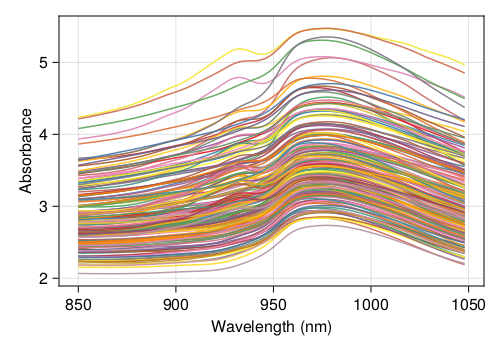

In [10]:
plotsp(X, wl_num;
    xlabel = "Wavelength (nm)", ylabel = "Absorbance").f

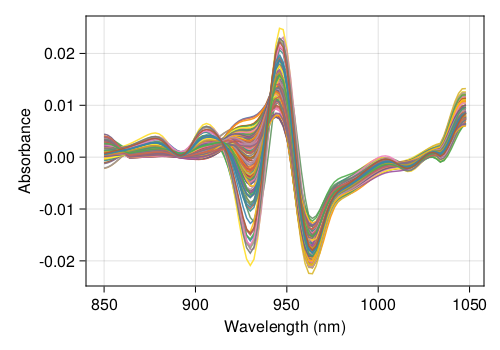

In [11]:
f = 15 ; pol = 3 ; d = 2
Xp = savgol(snv(X); f = f, pol = pol, d = d)

plotsp(Xp, wl_num;
    xlabel = "Wavelength (nm)", ylabel = "Absorbance").f

In [12]:
s = typ .== "train"
Xtrain = Xp[s, :]
Ytrain = Y[s, namy]
Xtest = rmrow(Xp, s)
Ytest = rmrow(Y[:, namy], s)
ntrain = nro(Xtrain)
ntest = nro(Xtest)
ntot = ntrain + ntest
(ntot = ntot, ntrain, ntest)

(ntot = 178, ntrain = 115, ntest = 63)

In [13]:
j = 2
nam = namy[j]    # y-variable
ytrain = Ytrain[:, nam]
ytest = Ytest[:, nam]

63-element Vector{Float64}:
 29.8
  1.4
  4.6
 11.0
 17.0
 22.4
 27.9
 46.5
  6.1
  2.0
  ⋮
 18.1
 19.4
 24.8
 27.2
 28.4
 31.3
 33.8
 35.5
 42.5

In [14]:
segm = segmkf(ntrain, 4; rep = 5)

5-element Vector{Any}:
 [[2, 7, 17, 21, 23, 27, 32, 34, 37, 38  …  72, 74, 77, 79, 92, 93, 98, 99, 101, 115], [3, 4, 5, 9, 10, 19, 29, 39, 40, 45  …  83, 87, 88, 90, 91, 94, 100, 104, 107, 108], [11, 12, 13, 14, 15, 20, 22, 24, 25, 26  …  64, 75, 78, 85, 86, 95, 97, 103, 106, 110], [1, 6, 8, 16, 18, 28, 30, 31, 33, 35  …  84, 89, 96, 102, 105, 109, 111, 112, 113, 114]]
 [[2, 4, 8, 11, 18, 24, 28, 33, 36, 42  …  82, 90, 92, 94, 95, 96, 103, 104, 105, 108], [1, 9, 17, 19, 26, 27, 29, 30, 35, 38  …  77, 79, 83, 84, 86, 88, 102, 107, 111, 112], [3, 5, 10, 14, 16, 20, 22, 25, 32, 34  …  78, 80, 81, 85, 89, 97, 98, 99, 106, 110], [6, 7, 12, 13, 15, 21, 23, 31, 37, 39  …  75, 87, 91, 93, 100, 101, 109, 113, 114, 115]]
 [[4, 8, 14, 16, 20, 25, 28, 30, 33, 40  …  71, 83, 84, 86, 97, 98, 106, 107, 109, 112], [1, 2, 5, 9, 13, 22, 23, 31, 34, 38  …  81, 87, 89, 92, 95, 101, 105, 108, 110, 113], [6, 15, 17, 21, 29, 32, 41, 42, 44, 45  …  78, 80, 88, 90, 93, 96, 99, 100, 102, 104], [3, 7, 10, 11, 12

In [15]:
nlvdis = [10; 15] ; metric = ["mahal"]
h = [1; 2; 6; Inf] ; k = [30; 50; 100]
nlv = 0:15
pars = mpar(nlvdis = nlvdis, metric = metric,
    h = h, k = k)

(nlvdis = Any[10, 15, 10, 15, 10, 15, 10, 15, 10, 15  …  10, 15, 10, 15, 10, 15, 10, 15, 10, 15], metric = Any["mahal", "mahal", "mahal", "mahal", "mahal", "mahal", "mahal", "mahal", "mahal", "mahal"  …  "mahal", "mahal", "mahal", "mahal", "mahal", "mahal", "mahal", "mahal", "mahal", "mahal"], h = Any[1.0, 1.0, 2.0, 2.0, 6.0, 6.0, Inf, Inf, 1.0, 1.0  …  Inf, Inf, 1.0, 1.0, 2.0, 2.0, 6.0, 6.0, Inf, Inf], k = Any[30, 30, 30, 30, 30, 30, 30, 30, 50, 50  …  50, 50, 100, 100, 100, 100, 100, 100, 100, 100])

In [16]:
length(pars[1])

24

In [17]:
res = gridcvlv(Xtrain, ytrain; segm = segm,
    score = rmsep, fun = lwplsr, nlv = nlv,
    pars = pars, verbose = false).res

Row,nlv,nlvdis,metric,h,k,y1
,Int64,Any,Any,Any,Any,Float64
1,0,10,mahal,1.0,30,5.4447
2,1,10,mahal,1.0,30,1.43929
3,2,10,mahal,1.0,30,1.31865
4,3,10,mahal,1.0,30,1.34752
5,4,10,mahal,1.0,30,1.41417
6,5,10,mahal,1.0,30,1.44438
7,6,10,mahal,1.0,30,1.64464
8,7,10,mahal,1.0,30,1.64443
9,8,10,mahal,1.0,30,1.80524


In [18]:
u = findall(res.y1 .== minimum(res.y1))[1]
res[u, :]

Row,nlv,nlvdis,metric,h,k,y1
,Int64,Any,Any,Any,Any,Float64
3,2,10,mahal,1.0,30,1.31865


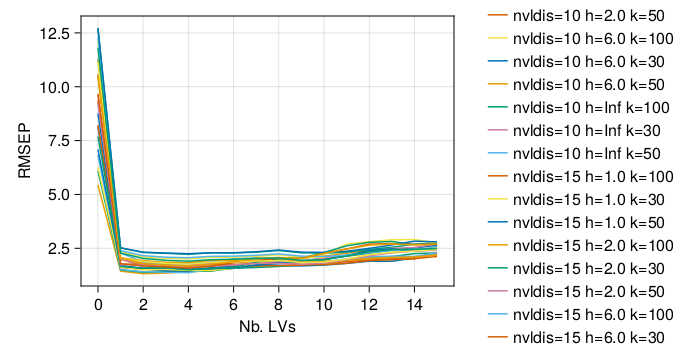

In [19]:
group = string.("nvldis=", res.nlvdis, " h=", res.h,
    " k=", res.k)
plotgrid(res.nlv, res.y1, group; step = 2,
    xlabel ="Nb. LVs", ylabel = "RMSEP").f

In [20]:
fm = lwplsr(Xtrain, ytrain; nlvdis = res.nlvdis[u],
    metric = res.metric[u], h = res.h[u], k = res.k[u],
    nlv = res.nlv[u]) ;
pred = Jchemo.predict(fm, Xtest).pred
@show rmsep(pred, ytest)

rmsep(pred, ytest) = [0.931208174412879;;]


1×1 Matrix{Float64}:
 0.931208174412879

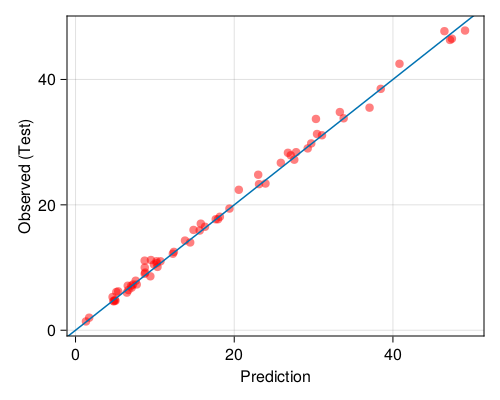

In [21]:
plotxy(vec(pred), ytest; resolution = (500, 400),
    color = (:red, .5), bisect = true,
    xlabel = "Prediction", ylabel = "Observed (Test)").f

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*